In [1]:
import os
#os.listdir(".")

In [2]:
# loading old model that we have saved
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [3]:
img_path = 'cats_and_dogs_small/test/cats/cat.1700.jpg'

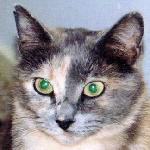

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img

In [5]:
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
#img_tensor

(150, 150, 3)


In [6]:
# 1 dimention is expanded
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
#img_tensor

(1, 150, 150, 3)


In [7]:
# Normalizing data
img_tensor /= 255.
#img_tensor

In [8]:
print(img_tensor.shape)

(1, 150, 150, 3)


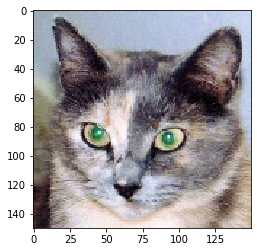

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [10]:
from tensorflow.keras import models
#Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]

#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [12]:
#For instance, this is the activation of the first convolution layer for the cat image input:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


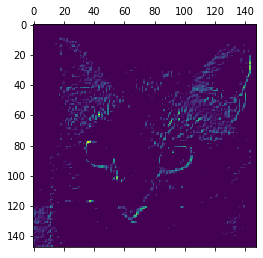

In [13]:
#Visualizing the fourth channel
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

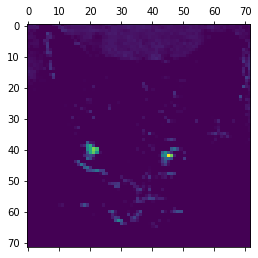

In [14]:
#Visualizing the seventh channel
second_layer_activation = activations[2]
plt.matshow(second_layer_activation[0, :, :, 7], cmap='viridis')

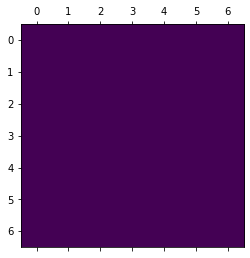

In [15]:
eight_layer_activation = activations[7]
plt.matshow(eight_layer_activation[0, :, :,20 ], cmap='viridis')